<a href="https://colab.research.google.com/github/vladimbo/Bayesian/blob/master/FREDPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import fredapi 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
from datetime import datetime

today = datetime.today()


fred = Fred(api_key='987fa600e241265c734c3dc51d515000')

dtindex = pd.date_range(start='2004-01-01', end=today, freq='D')

              0     1     2     3     4     5      6     7         8     9   \
2004-01-01  1.60  1.60  1.60  1.60  1.60  1.60  18.22  1.31  356000.0  5.87   
2004-01-02  1.60  1.60  1.60  1.60  1.60  1.60  18.22  1.31  356000.0  5.87   
2004-01-03  1.60  1.60  1.60  1.60  1.60  1.60  18.22  1.31  356000.0  5.87   
2004-01-04  1.60  1.60  1.60  1.60  1.60  1.60  18.22  1.31  356000.0  5.87   
2004-01-05  1.60  1.60  1.60  1.60  1.60  1.60  17.49  1.31  356000.0  5.87   
...          ...   ...   ...   ...   ...   ...    ...   ...       ...   ...   
2022-05-22  3.52  3.52  3.52  3.52  3.52  3.52  29.43  1.27  210000.0  5.25   
2022-05-23  3.52  3.52  3.52  3.52  3.52  3.52  28.48  1.27  210000.0  5.25   
2022-05-24  3.52  3.52  3.52  3.52  3.52  3.52  29.45  1.27  210000.0  5.25   
2022-05-25  3.52  3.52  3.52  3.52  3.52  3.52  28.37  1.27  210000.0  5.25   
2022-05-26  3.52  3.52  3.52  3.52  3.52  3.52  28.37  1.27  210000.0  5.10   

                   10    11    12    13    14    15

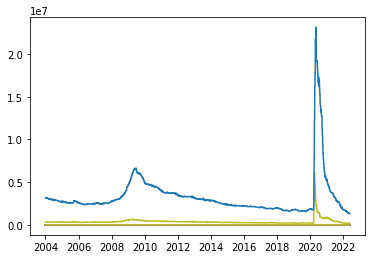

In [4]:
FDBS = pd.DataFrame(index=dtindex)
ftickers=['WEI', 'VIXCLS', 'ISRATIO', 'ICSA', 'MORTGAGE30US', 'CCSA', 'BAMLH0A0HYM2', 'T10Y2Y', 'T5YIE', 'DGS5', 
          'T30YIEM', 'DGS30', 'RVXCLS', 'GEPUCURRENT', 'EUEPUINDXM']
#for fticker in ftickers:
X1 = fred.get_series('WEI', observation_start='2004-01-01', observation_end= today)
X2 = fred.get_series('VIXCLS', observation_start='2004-01-01', observation_end=today)
X3 = fred.get_series('ISRATIO', observation_start='2004-01-01', observation_end=today)
X4 = fred.get_series('ICSA', observation_start='2004-01-01', observation_end=today)
X5 = fred.get_series('MORTGAGE30US', observation_start='2004-01-01', observation_end=today)
X6 = fred.get_series('CCSA', observation_start='2004-01-01', observation_end=today)
X7 = fred.get_series('BAMLH0A0HYM2', observation_start='2004-01-01', observation_end=today)
X8 = fred.get_series('T10Y2Y', observation_start='2004-01-01', observation_end=today)
X9 = fred.get_series('T5YIE', observation_start='2004-01-01', observation_end=today)
X10 = fred.get_series('DGS5', observation_start='2004-01-01', observation_end=today)
X11 = fred.get_series('T30YIEM', observation_start='2004-01-01', observation_end=today)
X12 = fred.get_series('DGS30', observation_start='2004-01-01', observation_end=today)
X13 = fred.get_series('RVXCLS', observation_start='2004-01-01', observation_end=today)
X14 = fred.get_series('GEPUCURRENT', observation_start='2004-01-01', observation_end=today)
X15 = fred.get_series('EUEPUINDXM', observation_start='2004-01-01', observation_end=today)

DBSF = pd.concat([FDBS, X1, X1, X1, X1, X1, X1, X2, X3, X4, X5, X6, X8, X9, 
                  X10, X11, X12, X13, X14, X15], axis=1)
DBSF.fillna(method='ffill', inplace=True)
DBSF.fillna(method='bfill', inplace=True)

print(DBSF)


plt.plot(DBSF)

['BOGMBASE', 'M2', 'M1', 'M1REAL', 'TSIFRGHT', 'SP500', 'DCOILBRENTEU', 'DTWEXBGS', 'WALCL', 'TOTCI', 'INDPRO', 'CHNMANMM101IXOBSAM', 'CHNCPIALLMINMEI', 'TRESEGCNM052N', 'IMPCH']
                   0        1        2       3      4        5       6   \
2004-01-01   736400.0   6064.9   1303.0   701.0  107.8  1332.42   29.55   
2004-01-02   736400.0   6064.9   1303.0   701.0  107.8  1332.42   29.55   
2004-01-03   736400.0   6064.9   1303.0   701.0  107.8  1332.42   29.55   
2004-01-04   736400.0   6064.9   1303.0   701.0  107.8  1332.42   29.55   
2004-01-05   736400.0   6064.9   1303.0   701.0  107.8  1332.42   32.30   
...               ...      ...      ...     ...    ...      ...     ...   
2022-05-22  5885200.0  19404.4  18105.1  7143.5  138.5  3901.36  113.63   
2022-05-23  5885200.0  19404.4  18105.1  7143.5  138.5  3973.75  115.13   
2022-05-24  5885200.0  19404.4  18105.1  7143.5  138.5  3941.48  115.13   
2022-05-25  5885200.0  19404.4  18105.1  7143.5  138.5  3978.73  115.13

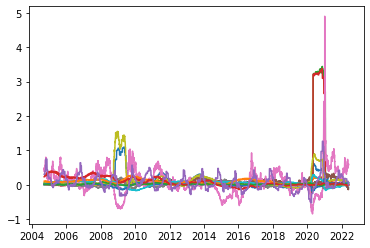

In [5]:
FDBSL = pd.DataFrame(index=dtindex)
tickers = ['BOGMBASE', 'M2', 'M1', 'M1REAL','TSIFRGHT', 'SP500','DCOILBRENTEU', 'DTWEXBGS', 'WALCL', 'TOTCI', 'INDPRO',
           'CHNMANMM101IXOBSAM', 'CHNCPIALLMINMEI', 'TRESEGCNM052N','IMPCH']
print(tickers)


X1 = fred.get_series('BOGMBASE', observation_start='2004-01-01', observation_end=today)
X2 = fred.get_series('M2', observation_start='2004-01-01', observation_end=today)
X3 = fred.get_series('M1', observation_start='2004-01-01', observation_end=today)
X4 = fred.get_series('M1REAL', observation_start='2004-01-01', observation_end=today)
X5 = fred.get_series('TSIFRGHT', observation_start='2004-01-01', observation_end=today)
X6 = fred.get_series('SP500', observation_start='2004-01-01', observation_end=today)
X7 = fred.get_series('DCOILBRENTEU', observation_start='2004-01-01', observation_end=today)
X8 = fred.get_series('DTWEXBGS', observation_start='2004-01-01', observation_end=today)
X9 = fred.get_series('WALCL', observation_start='2004-01-01', observation_end=today)
X10 = fred.get_series('TOTCI', observation_start='2004-01-01', observation_end=today)
X11 = fred.get_series('INDPRO', observation_start='2004-01-01', observation_end=today)
X12 = fred.get_series('CHNMANMM101IXOBSAM', observation_start='2004-01-01', observation_end=today)
X13 = fred.get_series('CHNCPIALLMINMEI', observation_start='2004-01-01', observation_end=today)
X14 = fred.get_series('TRESEGCNM052N', observation_start='2004-01-01', observation_end=today)
X15 = fred.get_series('IMPCH', observation_start='2004-01-01', observation_end=today)

DBSFL = pd.concat([FDBSL, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15], axis=1)


DBSFL.fillna(method='ffill', inplace=True)
DBSFL.fillna(method='bfill', inplace=True)

print(DBSFL)


DBSY = DBSFL.pct_change(260)
plt.plot(DBSY)

                  0         1         2         3         4         5   \
2004-01-01 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834   
2004-01-02 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834   
2004-01-03 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834   
2004-01-04 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834   
2004-01-05 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834 -0.013834   
...              ...       ...       ...       ...       ...       ...   
2022-05-22  0.785251  0.785251  0.785251  0.785251  0.785251  0.785251   
2022-05-23  0.785251  0.785251  0.785251  0.785251  0.785251  0.785251   
2022-05-24  0.785251  0.785251  0.785251  0.785251  0.785251  0.785251   
2022-05-25  0.785251  0.785251  0.785251  0.785251  0.785251  0.785251   
2022-05-26  0.785251  0.785251  0.785251  0.785251  0.785251  0.785251   

                  6         7         8         9   ...        5         6   \
2004-01-01 -0.086934 -0.259706 -

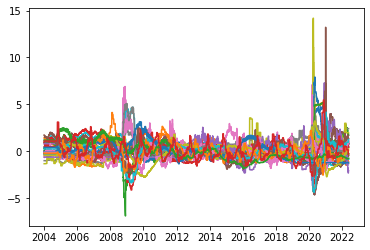

In [6]:
FDB = pd.DataFrame(index=dtindex)
DBS = pd.concat([FDB, DBSF, DBSY], axis=1)
mean = DBS.mean()
stdv = DBS.std()
DBS -= mean
DBS /= stdv
DBS.fillna(method='bfill', inplace=True)
DBS.fillna(method='ffill', inplace=True)
print(DBS)
plt.plot(DBS)



                 PC1       PC2       PC3       PC4
2004-01-01 -1.460953 -2.929198  0.588570  0.730558
2004-01-02 -1.460953 -2.929198  0.588570  0.730558
2004-01-03 -1.460953 -2.929198  0.588570  0.730558
2004-01-04 -1.460953 -2.929198  0.588570  0.730558
2004-01-05 -1.512354 -2.917728  0.613139  0.634925
...              ...       ...       ...       ...
2022-05-22 -2.059568  1.374844 -0.481580  0.155185
2022-05-23 -2.136041  1.368746 -0.398101  0.113872
2022-05-24 -2.078016  1.406576 -0.437537  0.207879
2022-05-25 -2.147846  1.455006 -0.341058  0.137228
2022-05-26 -2.162290  1.496822 -0.300482  0.130153

[6721 rows x 4 columns]


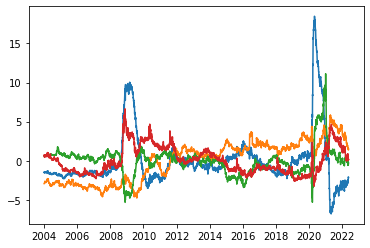

In [7]:
DBSNP = DBS.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
DBSPC = pca.fit_transform(DBSNP)
DBSP = pd.DataFrame({'PC1': DBSPC[:, 0], 'PC2': DBSPC[:, 1], 'PC3': DBSPC[:,2], 'PC4': DBSPC[:,3]}, index=dtindex)
print(DBSP)
plt.plot(DBSP)